In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
games = pd.read_csv('/content/drive/MyDrive/[SW.BAND] 1 games.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
games.shape

(16598, 11)

In [ ]:
games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
games.isna().sum().sum()

329

In [ ]:
games.duplicated().sum()

0

In [ ]:
games = games.dropna()
games.shape

(16291, 11)

In [ ]:
games.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [ ]:
games['Year'] = games['Year'].astype(int)

### 2) Распределение выпуска игр по годам

<Axes: xlabel='Year', ylabel='Game_Count'>

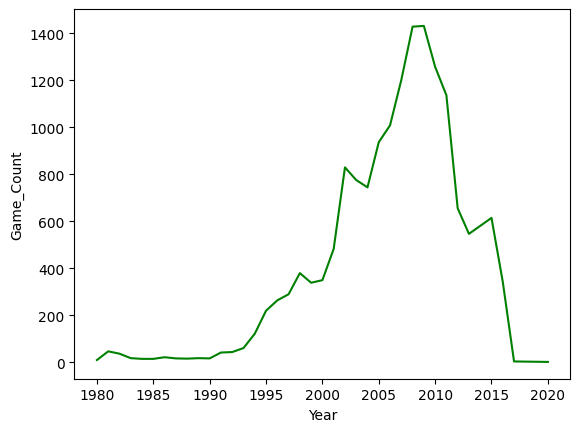

In [ ]:
games_years = games.groupby('Year').agg({'Name': 'count'}).sort_values('Year').rename(columns = {'Name': 'Game_Count'}).reset_index()
games_years
sns.lineplot(games_years, x = 'Year', y = 'Game_Count', color = 'green')

### 2-3) Распределение выпуска игр по годам с разделением на платформы выпуска

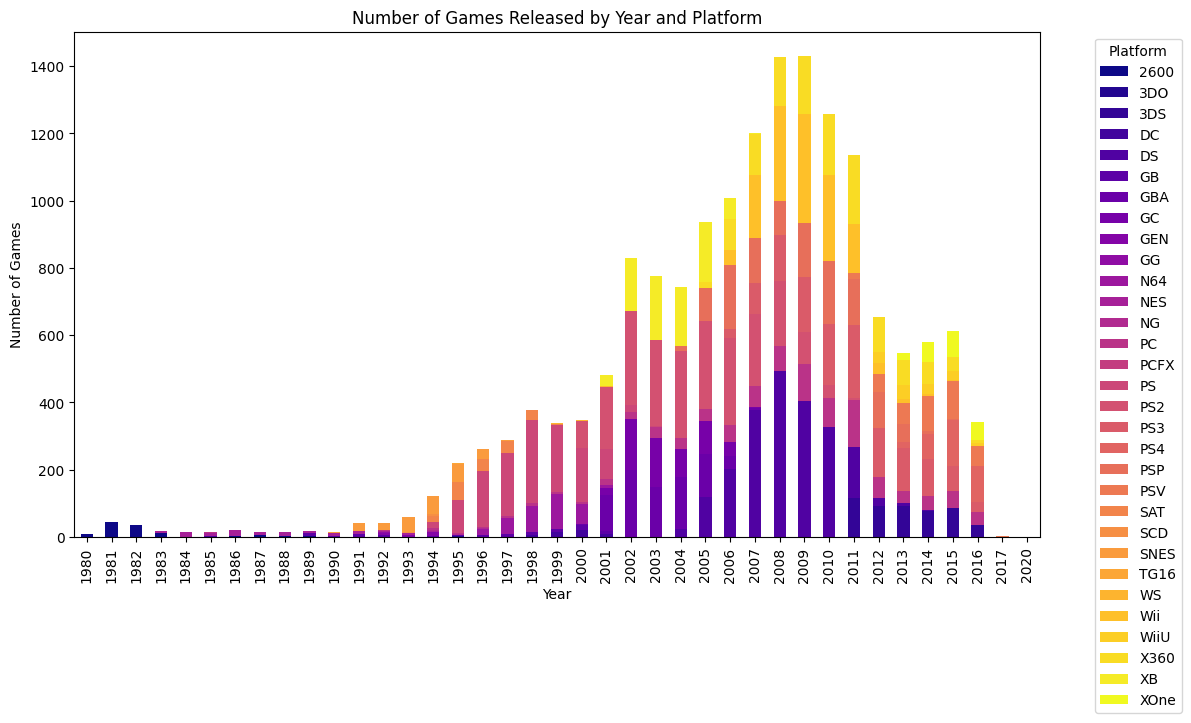

In [ ]:
games_platform = games.groupby(['Year', 'Platform']).agg({'Name': 'count'}).sort_values('Year').rename(columns = {'Name': 'Game_Count'}).reset_index().pivot(index = 'Year', columns = 'Platform', values = 'Game_Count').fillna(0)
games_platform.plot(kind='bar', stacked=True, figsize=(12, 7), cmap = 'plasma')

plt.title('Number of Games Released by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### 3.1) Платформы, на которых выпускалось наибольшее количество игр по годам

In [ ]:
games_platform_max = games.groupby(['Year', 'Platform']).agg({'Name': 'count'}).sort_values('Year').rename(columns = {'Name': 'Game_Count'}).reset_index()
max_games_per_year = games_platform_max.groupby('Year').agg({'Game_Count': 'max'})
result = max_games_per_year.join(games_platform_max.set_index(['Year', 'Game_Count']), on=['Year', 'Game_Count']).reset_index()
result

,Year,Game_Count,Platform
0,1980,9,2600
1,1981,46,2600
2,1982,36,2600
3,1983,11,2600
4,1984,13,NES
5,1985,11,NES
6,1986,19,NES
7,1987,10,NES
8,1988,11,NES
9,1989,10,GB


### 3.2) Платформа, на которой было выпущено наибольшее количество игр за все время

In [ ]:
platform_games = games.groupby('Platform').agg({'Name': 'count'}).rename(columns = {'Name': 'Count_Releases'}).reset_index()
max_platform_games = platform_games[platform_games['Count_Releases'] == platform_games['Count_Releases'].max()]
max_platform_games['Platform']

,Platform
4,DS


### 4) Издатели

In [ ]:
publisher_games = games.groupby('Publisher').agg({'Name': 'count'}).rename(columns = {'Name': 'Releases'}).reset_index()
publisher_games_winner = publisher_games[publisher_games['Releases'] == publisher_games['Releases'].max()]['Publisher']
publisher_games_winner

,Publisher
138,Electronic Arts


### 5) Регионы продаж

#### 5.1) Распределение продаж по регионам в отдельные отчетные годы

<Axes: xlabel='Year'>

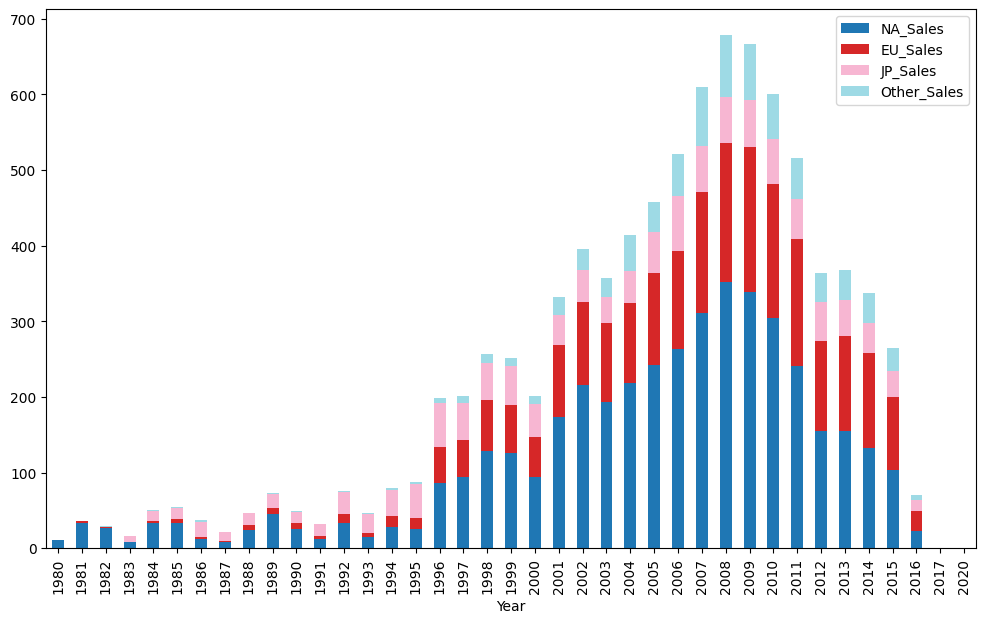

In [ ]:
region_sales = games.groupby('Year').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum'})
region_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar', stacked=True, figsize=(12, 7), cmap = 'tab20')

#### 5.3) Регионы с максимальным количеством продаж по годам

In [ ]:
max_region_sales = region_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
max_sales_per_year = max_region_sales.max(axis=1)
max_region = max_region_sales.idxmax(axis= 1)
years = max_region_sales.index

df_res = pd.DataFrame({
    'Region': max_region,
    'Sales': max_sales_per_year
}).reset_index()
df_res

,Year,Region,Sales
0,1980,NA_Sales,10.59
1,1981,NA_Sales,33.40
2,1982,NA_Sales,26.92
3,1983,JP_Sales,8.10
4,1984,NA_Sales,33.28
5,1985,NA_Sales,33.73
6,1986,JP_Sales,19.81
7,1987,JP_Sales,11.63
8,1988,NA_Sales,23.87
9,1989,NA_Sales,45.15


#### 5.2) Регион с наибольшим количеством продаж за все время

In [ ]:
total_sales = games.agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum'}).reset_index()
max_sales = total_sales[total_sales[0] == total_sales[0].max()][0]
max_sales_region = total_sales[total_sales[0] == total_sales[0].max()]['index']
print(max_sales_region)
print(max_sales)

4    Global_Sales
Name: index, dtype: object
4    8811.97
Name: 0, dtype: float64


Медианное значение продаж

In [ ]:
total_sales = games.agg({'NA_Sales': 'median', 'EU_Sales': 'median', 'JP_Sales': 'median', 'Other_Sales': 'median', 'Global_Sales': 'median'}).reset_index()
max_sales = total_sales[total_sales[0] == total_sales[0].max()][0]
max_sales_region = total_sales[total_sales[0] == total_sales[0].max()]['index']
print(max_sales_region)
print(max_sales)

4    Global_Sales
Name: index, dtype: object
4    0.17
Name: 0, dtype: float64


### 6) Японские продажи

In [ ]:
japan_games = games.groupby('Genre').agg({'JP_Sales': 'sum'}).reset_index()
japan_games.describe()

,JP_Sales
count,12.000000
mean,107.022500
std,86.158702
min,38.180000
25%,55.455000
50%,75.345000
75%,131.677500
max,350.290000


### 7) Динамика изменения мировых продаж

<Axes: xlabel='Year'>

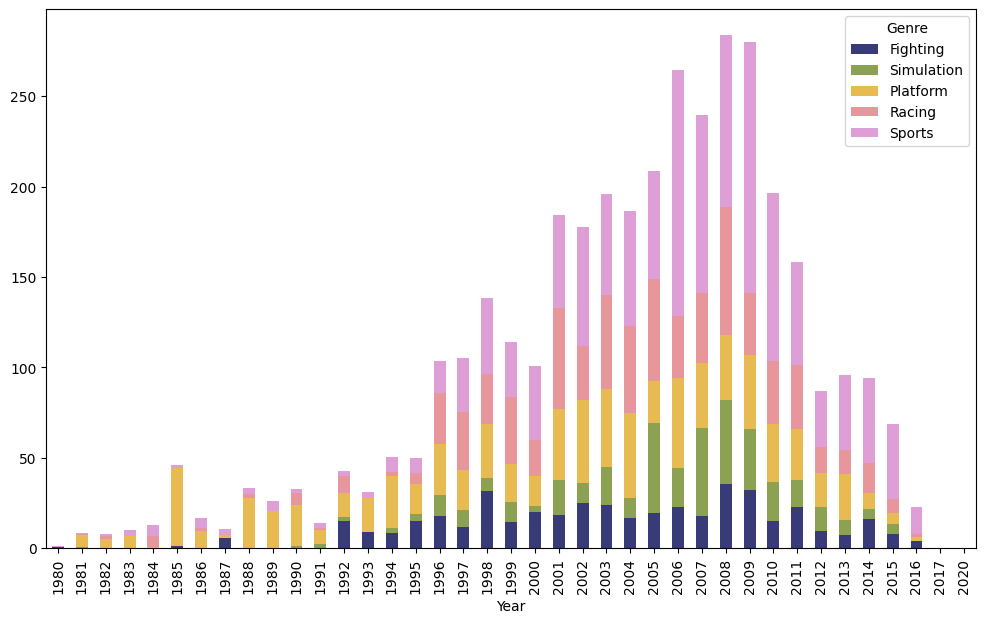

In [ ]:
global_sales = games.groupby(['Year', 'Genre']).agg({'Global_Sales': 'sum'}).reset_index().pivot(index = 'Year', columns = 'Genre', values = 'Global_Sales').fillna(0)
global_sales = global_sales[['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']]
global_sales

global_sales.plot(kind='bar', stacked=True, figsize=(12, 7), cmap = 'tab20b')

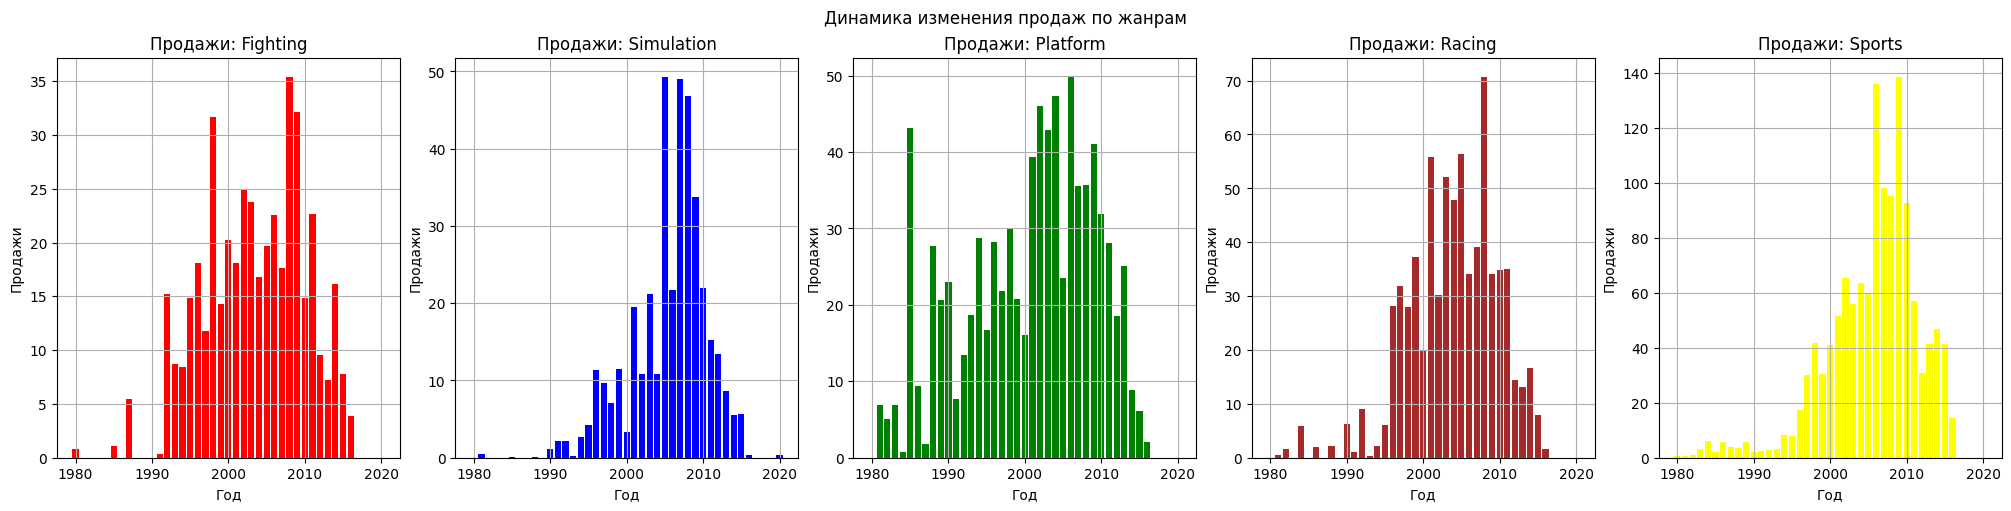

In [ ]:
global_sales = global_sales.reset_index()

genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
colors = ['red', 'blue', 'green', 'brown', 'yellow']
fig, axs = plt.subplots(1, 5, figsize=(20, 5), constrained_layout=True)

for i, genre in enumerate(genres):
    axs[i].bar(global_sales['Year'], global_sales[genre], label=genre, color = colors[i])
    axs[i].set_title(f'Продажи: {genre}')
    axs[i].set_xlabel('Год')
    axs[i].set_ylabel('Продажи')
    axs[i].grid(True)

plt.suptitle('Динамика изменения продаж по жанрам')
plt.show()

<BarContainer object of 39 artists>

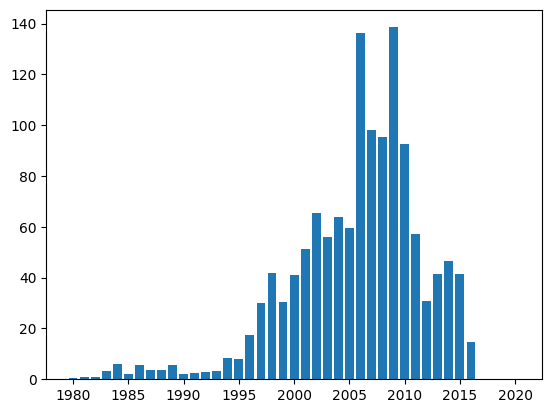

In [ ]:
plt.bar(global_sales['Year'], global_sales['Sports'], label='Sports')

2006 и 2009 - годы наибольших продаж игр жанра Sports